## Data Cleaning and EDA for Hotel Booking Dataset

### Imports and Data Loading

#### Imports

In [10]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from pyspark.sql import SparkSession

#### Spark Initialization

In [4]:
# remove any old spark vars remaining
os.environ.pop("SPARK_MASTER", None)
os.environ["PYSPARK_SUBMIT_ARGS"] = "--master local[*] pyspark-shell"

# stop spark sessions remaining
try:
    from pyspark.sql import SparkSession
    spark = SparkSession.getActiveSession()
    if spark is not None:
        spark.stop()
except Exception as e:
    print("No active Spark session found.")

In [ ]:
# new spark session that runs locally
spark = (
    SparkSession.builder
    .appName("HotelBookingDataCleaning")
    .master("local[*]")
    .config("spark.driver.host", "127.0.0.1")
    .config("spark.driver.bindAddress", "127.0.0.1")
    .getOrCreate()
)

#### Data Reading and Schema Viewing

In [6]:
hotel_booking = spark.read.csv('datasets/hotel-booking.csv', header=True, inferSchema=True)

In [7]:
hotel_booking.printSchema()

root
 |-- hotel: string (nullable = true)
 |-- booking_status: integer (nullable = true)
 |-- lead_time: integer (nullable = true)
 |-- arrival_year: integer (nullable = true)
 |-- arrival_month: string (nullable = true)
 |-- arrival_date_week_number: integer (nullable = true)
 |-- arrival_date_day_of_month: integer (nullable = true)
 |-- stays_in_weekend_nights: integer (nullable = true)
 |-- stays_in_week_nights: integer (nullable = true)
 |-- market_segment_type: string (nullable = true)
 |-- country: string (nullable = true)
 |-- avg_price_per_room: double (nullable = true)
 |-- email: string (nullable = true)



### EDA

In [16]:
hotel_pd = hotel_booking.toPandas()

#### Hotel Column

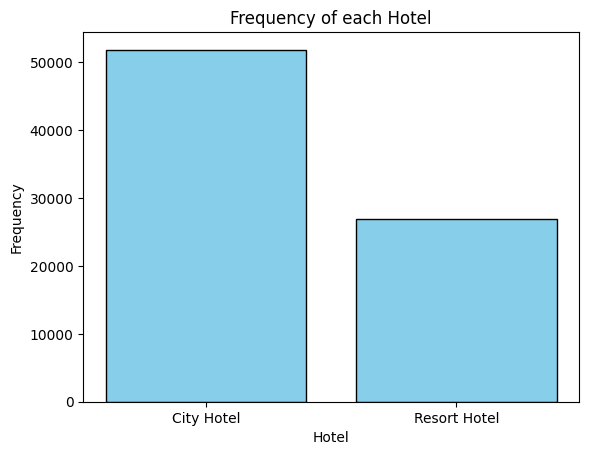

Frequencies of each hotel:
          hotel  count
0    City Hotel  51822
1  Resort Hotel  26881


In [32]:
# frequency for hotel column
hotel_counts = hotel_pd["hotel"].value_counts().reset_index()

# bar chart
plt.bar(hotel_counts["hotel"], hotel_counts["count"], color="skyblue", edgecolor="black")
plt.xlabel("Hotel")
plt.ylabel("Frequency")
plt.title("Frequency of each Hotel")
plt.show()

# frequency table
print("Frequencies of each hotel:")
print(hotel_counts)

#### Booking Status Column

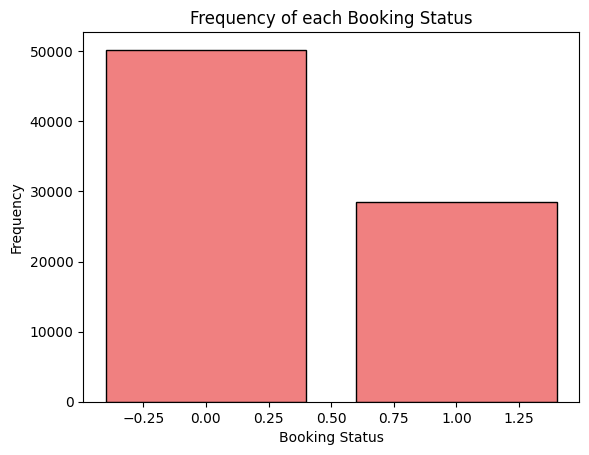

Frequencies of Booking Status:
   booking_status  count
0               0  50224
1               1  28479


In [38]:
# frequency for booking status column
booking_status_counts = hotel_pd["booking_status"].value_counts().reset_index()

# bar chart
plt.bar(booking_status_counts["booking_status"], booking_status_counts["count"], color="lightcoral", edgecolor="black")
plt.xlabel("Booking Status")
plt.ylabel("Frequency")
plt.title("Frequency of each Booking Status")
plt.show()

# frequency table
print("Frequencies of Booking Status:")
print(booking_status_counts)

#### Lead Time Column

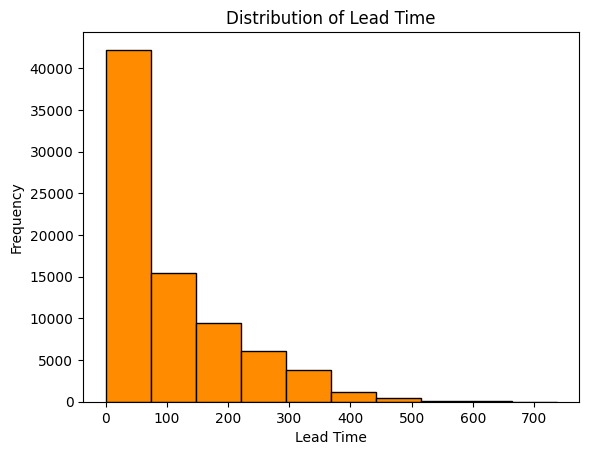

In [39]:
plt.hist(hotel_pd["lead_time"], bins=10, color="darkorange", edgecolor="black")
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.title("Distribution of Lead Time")

plt.show()

In [43]:
hotel_pd["lead_time"].describe()

count    78703.000000
mean       101.298464
std        106.200649
min          0.000000
25%         16.000000
50%         65.000000
75%        158.000000
max        737.000000
Name: lead_time, dtype: float64

#### Arrival Date Columns

In [54]:
arrival_date_counts = hotel_pd.groupby(["arrival_year", "arrival_month"]).size().reset_index(name="count")

arrival_date_counts = arrival_date_counts.sort_values(by="count", ascending=False)

arrival_date_counts

,arrival_year,arrival_month,count
16,2016,October,6203
14,2016,May,5478
6,2016,April,5428
17,2016,September,5394
12,2016,June,5292
5,2015,September,5114
7,2016,August,5063
4,2015,October,4957
13,2016,March,4824
11,2016,July,4572


#### Weekday and Weekend Staying Columns

#### Market Segment Type Column

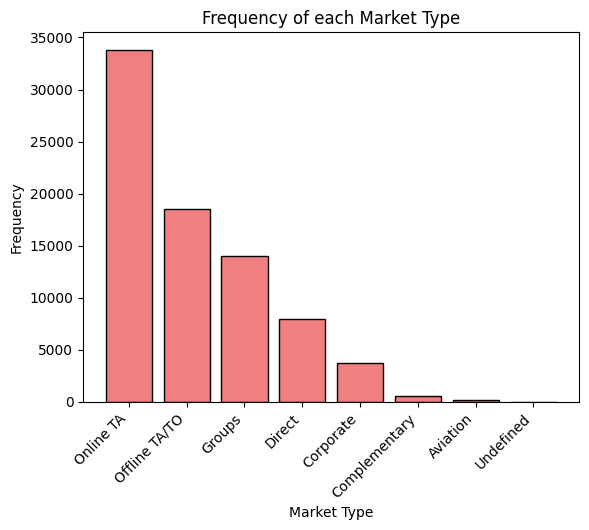

Frequencies of Booking Status:
  market_segment_type  count
0           Online TA  33826
1       Offline TA/TO  18552
2              Groups  13957
3              Direct   7977
4           Corporate   3733
5       Complementary    529
6            Aviation    127
7           Undefined      2


In [42]:
# frequency for market column
market_counts = hotel_pd["market_segment_type"].value_counts().reset_index()

# bar chart
plt.bar(market_counts["market_segment_type"], market_counts["count"], color="lightcoral", edgecolor="black")
plt.xlabel("Market Type")
plt.ylabel("Frequency")
plt.title("Frequency of each Market Type")
plt.xticks(rotation=45, ha="right")
plt.show()

# frequency table
print("Frequencies of Booking Status:")
print(market_counts)

#### Country Column

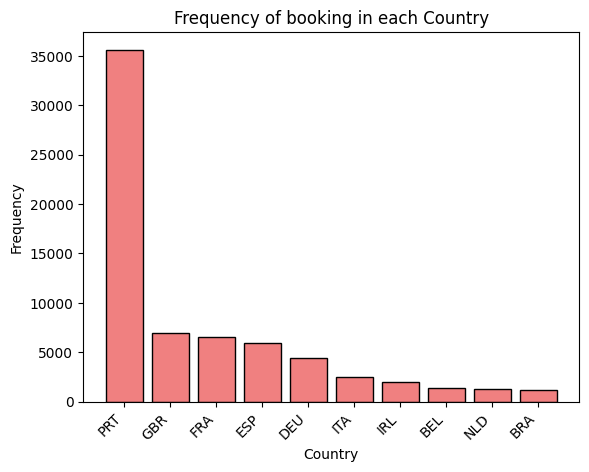

Frequencies of booking in each Country:
  country  count
0     PRT  35628
1     GBR   6941
2     FRA   6513
3     ESP   5956
4     DEU   4389
5     ITA   2453
6     IRL   1972
7     BEL   1344
8     NLD   1300
9     BRA   1214


In [47]:
# frequency for market column
country_counts = hotel_pd["country"].value_counts().head(10).reset_index()

# bar chart
plt.bar(country_counts["country"], country_counts["count"], color="lightcoral", edgecolor="black")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Frequency of booking in each Country")
plt.xticks(rotation=45, ha="right")
plt.show()

# frequency table
print("Frequencies of booking in each Country:")
print(country_counts)

#### Average Price Column

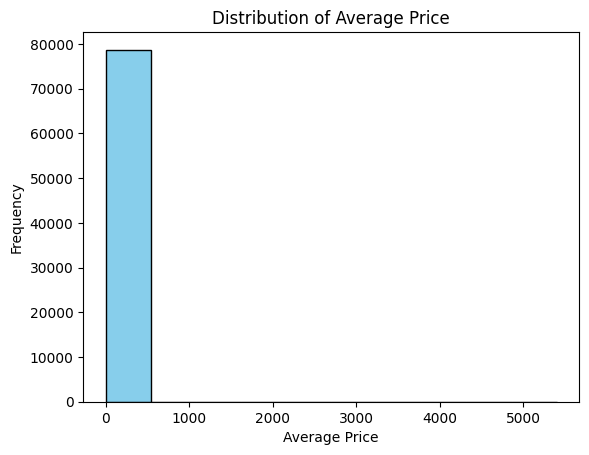

In [26]:
plt.hist(hotel_pd["avg_price_per_room"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Average Price")
plt.ylabel("Frequency")
plt.title("Distribution of Average Price")

plt.show()

In [45]:
hotel_pd["avg_price_per_room"].describe()

count    78703.000000
mean        95.210390
std         48.309882
min          0.000000
25%         65.000000
50%         89.000000
75%        117.300000
max       5400.000000
Name: avg_price_per_room, dtype: float64

### Conclusion

In [19]:
spark.stop()